In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: XMR-USD
Start: 2021-01-22 16:30:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1384 
Tsesting data: 1385 


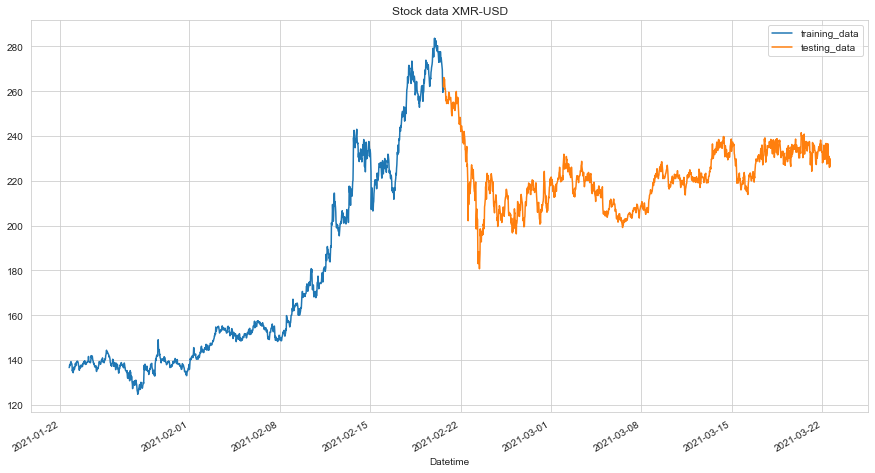

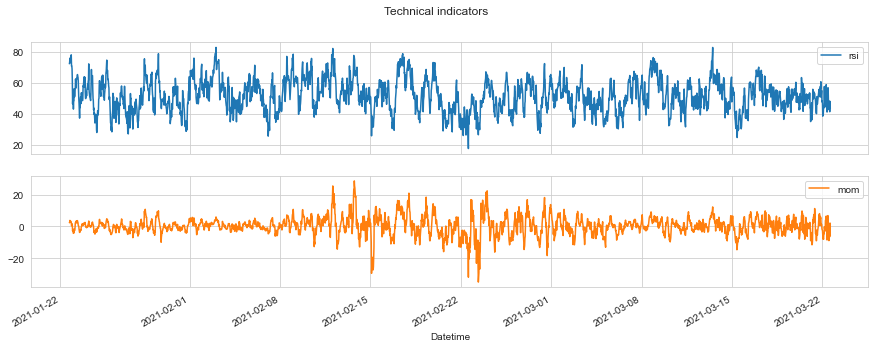

In [2]:
stock_name = 'xmr-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1325.78, duration: 0:00:00.247056
episode: 2/2000, episode end value: 1309.60, duration: 0:00:00.226050
episode: 3/2000, episode end value: 1311.48, duration: 0:00:00.237054
episode: 4/2000, episode end value: 1321.42, duration: 0:00:00.228050
episode: 5/2000, episode end value: 1329.85, duration: 0:00:00.211047
episode: 6/2000, episode end value: 1348.25, duration: 0:00:00.206047
episode: 7/2000, episode end value: 1322.22, duration: 0:00:00.214048
episode: 8/2000, episode end value: 1306.66, duration: 0:00:00.205043
episode: 9/2000, episode end value: 1368.38, duration: 0:00:00.226055
episode: 10/2000, episode end value: 1302.85, duration: 0:00:00.224046
episode: 11/2000, episode end value: 1379.84, duration: 0:00:00.216049
episode: 12/2000, episode end value: 1307.74, duration: 0:00:00.233056
episode: 13/2000, episode end value: 1325.17, duration: 0:00:00.244052
episode: 14/2000, episode end value: 1328.02, duration: 0:00:00.253055
episode: 15/200

episode: 117/2000, episode end value: 1305.85, duration: 0:00:00.370081
episode: 118/2000, episode end value: 1311.32, duration: 0:00:00.353076
episode: 119/2000, episode end value: 1312.31, duration: 0:00:00.383088
episode: 120/2000, episode end value: 1310.28, duration: 0:00:00.337075
episode: 121/2000, episode end value: 1317.22, duration: 0:00:00.345077
episode: 122/2000, episode end value: 1313.83, duration: 0:00:00.342076
episode: 123/2000, episode end value: 1312.99, duration: 0:00:00.345075
episode: 124/2000, episode end value: 1313.03, duration: 0:00:00.320074
episode: 125/2000, episode end value: 1313.45, duration: 0:00:00.345078
episode: 126/2000, episode end value: 1312.49, duration: 0:00:00.318070
episode: 127/2000, episode end value: 1312.38, duration: 0:00:00.329090
episode: 128/2000, episode end value: 1312.76, duration: 0:00:00.318073
episode: 129/2000, episode end value: 1312.77, duration: 0:00:00.338074
episode: 130/2000, episode end value: 1313.06, duration: 0:00:00

episode: 231/2000, episode end value: 1312.47, duration: 0:00:00.357083
episode: 232/2000, episode end value: 1312.11, duration: 0:00:00.352079
episode: 233/2000, episode end value: 1313.22, duration: 0:00:00.373083
episode: 234/2000, episode end value: 1312.18, duration: 0:00:00.345079
episode: 235/2000, episode end value: 1311.99, duration: 0:00:00.378088
episode: 236/2000, episode end value: 1312.59, duration: 0:00:00.364076
episode: 237/2000, episode end value: 1312.11, duration: 0:00:00.353078
episode: 238/2000, episode end value: 1313.20, duration: 0:00:00.363081
episode: 239/2000, episode end value: 1312.82, duration: 0:00:00.356078
episode: 240/2000, episode end value: 1311.82, duration: 0:00:00.346077
episode: 241/2000, episode end value: 1311.99, duration: 0:00:00.374084
episode: 242/2000, episode end value: 1308.48, duration: 0:00:00.363079
episode: 243/2000, episode end value: 1312.33, duration: 0:00:00.352082
episode: 244/2000, episode end value: 1311.66, duration: 0:00:00

episode: 345/2000, episode end value: 1312.67, duration: 0:00:00.375085
episode: 346/2000, episode end value: 1314.85, duration: 0:00:00.400091
episode: 347/2000, episode end value: 1313.32, duration: 0:00:00.375083
episode: 348/2000, episode end value: 1312.40, duration: 0:00:00.342078
episode: 349/2000, episode end value: 1311.62, duration: 0:00:00.405090
episode: 350/2000, episode end value: 1312.97, duration: 0:00:00.438099
episode: 351/2000, episode end value: 1312.67, duration: 0:00:00.384090
episode: 352/2000, episode end value: 1312.46, duration: 0:00:00.351077
episode: 353/2000, episode end value: 1312.00, duration: 0:00:00.363080
episode: 354/2000, episode end value: 1311.93, duration: 0:00:00.352078
episode: 355/2000, episode end value: 1312.16, duration: 0:00:00.393086
episode: 356/2000, episode end value: 1311.43, duration: 0:00:00.376090
episode: 357/2000, episode end value: 1311.11, duration: 0:00:00.360081
episode: 358/2000, episode end value: 1312.09, duration: 0:00:00

episode: 459/2000, episode end value: 1311.79, duration: 0:00:00.361079
episode: 460/2000, episode end value: 1312.13, duration: 0:00:00.387087
episode: 461/2000, episode end value: 1314.73, duration: 0:00:00.382079
episode: 462/2000, episode end value: 1309.46, duration: 0:00:00.369084
episode: 463/2000, episode end value: 1315.10, duration: 0:00:00.405090
episode: 464/2000, episode end value: 1314.30, duration: 0:00:00.524119
episode: 465/2000, episode end value: 1312.59, duration: 0:00:00.448103
episode: 466/2000, episode end value: 1313.45, duration: 0:00:00.430095
episode: 467/2000, episode end value: 1312.16, duration: 0:00:00.448106
episode: 468/2000, episode end value: 1314.14, duration: 0:00:00.455100
episode: 469/2000, episode end value: 1313.13, duration: 0:00:00.421092
episode: 470/2000, episode end value: 1311.95, duration: 0:00:00.373082
episode: 471/2000, episode end value: 1312.24, duration: 0:00:00.399088
episode: 472/2000, episode end value: 1312.27, duration: 0:00:00

episode: 573/2000, episode end value: 1314.97, duration: 0:00:00.308072
episode: 574/2000, episode end value: 1311.60, duration: 0:00:00.342072
episode: 575/2000, episode end value: 1313.14, duration: 0:00:00.349078
episode: 576/2000, episode end value: 1313.55, duration: 0:00:00.327075
episode: 577/2000, episode end value: 1314.04, duration: 0:00:00.348080
episode: 578/2000, episode end value: 1311.37, duration: 0:00:00.293059
episode: 579/2000, episode end value: 1310.51, duration: 0:00:00.315072
episode: 580/2000, episode end value: 1312.19, duration: 0:00:00.306070
episode: 581/2000, episode end value: 1312.65, duration: 0:00:00.360080
episode: 582/2000, episode end value: 1315.69, duration: 0:00:00.373084
episode: 583/2000, episode end value: 1312.43, duration: 0:00:00.357081
episode: 584/2000, episode end value: 1311.41, duration: 0:00:00.307070
episode: 585/2000, episode end value: 1310.76, duration: 0:00:00.319069
episode: 586/2000, episode end value: 1314.15, duration: 0:00:00

episode: 687/2000, episode end value: 1315.67, duration: 0:00:00.502641
episode: 688/2000, episode end value: 1316.95, duration: 0:00:00.394084
episode: 689/2000, episode end value: 1312.63, duration: 0:00:00.434102
episode: 690/2000, episode end value: 1307.68, duration: 0:00:00.444095
episode: 691/2000, episode end value: 1314.75, duration: 0:00:00.411091
episode: 692/2000, episode end value: 1309.03, duration: 0:00:00.370086
episode: 693/2000, episode end value: 1310.33, duration: 0:00:00.403091
episode: 694/2000, episode end value: 1313.36, duration: 0:00:00.429096
episode: 695/2000, episode end value: 1313.43, duration: 0:00:00.361077
episode: 696/2000, episode end value: 1309.92, duration: 0:00:00.418092
episode: 697/2000, episode end value: 1306.84, duration: 0:00:00.400089
episode: 698/2000, episode end value: 1309.35, duration: 0:00:00.422093
episode: 699/2000, episode end value: 1309.30, duration: 0:00:00.325076
episode: 700/2000, episode end value: 1300.89, duration: 0:00:00

episode: 801/2000, episode end value: 1306.59, duration: 0:00:00.415093
episode: 802/2000, episode end value: 1311.98, duration: 0:00:00.376085
episode: 803/2000, episode end value: 1311.98, duration: 0:00:00.388087
episode: 804/2000, episode end value: 1316.08, duration: 0:00:00.337077
episode: 805/2000, episode end value: 1311.69, duration: 0:00:00.362078
episode: 806/2000, episode end value: 1310.55, duration: 0:00:00.403095
episode: 807/2000, episode end value: 1312.47, duration: 0:00:00.385080
episode: 808/2000, episode end value: 1311.85, duration: 0:00:00.391088
episode: 809/2000, episode end value: 1308.05, duration: 0:00:00.384085
episode: 810/2000, episode end value: 1315.37, duration: 0:00:00.368084
episode: 811/2000, episode end value: 1308.16, duration: 0:00:00.431097
episode: 812/2000, episode end value: 1313.07, duration: 0:00:00.378080
episode: 813/2000, episode end value: 1312.76, duration: 0:00:00.387091
episode: 814/2000, episode end value: 1309.44, duration: 0:00:00

episode: 915/2000, episode end value: 1308.53, duration: 0:00:00.281572
episode: 916/2000, episode end value: 1310.85, duration: 0:00:00.278188
episode: 917/2000, episode end value: 1313.07, duration: 0:00:00.277791
episode: 918/2000, episode end value: 1309.95, duration: 0:00:00.283065
episode: 919/2000, episode end value: 1310.55, duration: 0:00:00.319071
episode: 920/2000, episode end value: 1308.44, duration: 0:00:00.290064
episode: 921/2000, episode end value: 1307.66, duration: 0:00:00.269064
episode: 922/2000, episode end value: 1305.72, duration: 0:00:00.275058
episode: 923/2000, episode end value: 1310.48, duration: 0:00:00.289070
episode: 924/2000, episode end value: 1306.05, duration: 0:00:00.311069
episode: 925/2000, episode end value: 1313.35, duration: 0:00:00.289808
episode: 926/2000, episode end value: 1305.87, duration: 0:00:00.330016
episode: 927/2000, episode end value: 1304.97, duration: 0:00:00.295067
episode: 928/2000, episode end value: 1306.17, duration: 0:00:00

episode: 1029/2000, episode end value: 1312.16, duration: 0:00:00.310070
episode: 1030/2000, episode end value: 1307.45, duration: 0:00:00.282068
episode: 1031/2000, episode end value: 1302.30, duration: 0:00:00.284059
episode: 1032/2000, episode end value: 1305.66, duration: 0:00:00.275064
episode: 1033/2000, episode end value: 1300.70, duration: 0:00:00.297067
episode: 1034/2000, episode end value: 1309.72, duration: 0:00:00.289064
episode: 1035/2000, episode end value: 1305.80, duration: 0:00:00.280061
episode: 1036/2000, episode end value: 1307.41, duration: 0:00:00.281063
episode: 1037/2000, episode end value: 1306.79, duration: 0:00:00.277065
episode: 1038/2000, episode end value: 1306.93, duration: 0:00:00.281061
episode: 1039/2000, episode end value: 1302.95, duration: 0:00:00.280063
episode: 1040/2000, episode end value: 1309.06, duration: 0:00:00.280064
episode: 1041/2000, episode end value: 1306.95, duration: 0:00:00.291064
episode: 1042/2000, episode end value: 1310.74, dur

episode: 1142/2000, episode end value: 1299.11, duration: 0:00:00.324070
episode: 1143/2000, episode end value: 1300.00, duration: 0:00:00.368088
episode: 1144/2000, episode end value: 1313.37, duration: 0:00:00.325070
episode: 1145/2000, episode end value: 1304.33, duration: 0:00:00.340077
episode: 1146/2000, episode end value: 1299.91, duration: 0:00:00.324074
episode: 1147/2000, episode end value: 1308.41, duration: 0:00:00.280066
episode: 1148/2000, episode end value: 1307.19, duration: 0:00:00.274450
episode: 1149/2000, episode end value: 1313.30, duration: 0:00:00.296607
episode: 1150/2000, episode end value: 1305.06, duration: 0:00:00.300068
episode: 1151/2000, episode end value: 1300.57, duration: 0:00:00.311067
episode: 1152/2000, episode end value: 1306.78, duration: 0:00:00.298067
episode: 1153/2000, episode end value: 1307.67, duration: 0:00:00.282061
episode: 1154/2000, episode end value: 1303.37, duration: 0:00:00.300064
episode: 1155/2000, episode end value: 1321.51, dur

episode: 1255/2000, episode end value: 1301.63, duration: 0:00:00.344063
episode: 1256/2000, episode end value: 1318.87, duration: 0:00:00.333079
episode: 1257/2000, episode end value: 1306.95, duration: 0:00:00.315068
episode: 1258/2000, episode end value: 1312.38, duration: 0:00:00.341078
episode: 1259/2000, episode end value: 1318.00, duration: 0:00:00.321075
episode: 1260/2000, episode end value: 1300.25, duration: 0:00:00.351078
episode: 1261/2000, episode end value: 1308.85, duration: 0:00:00.315072
episode: 1262/2000, episode end value: 1308.28, duration: 0:00:00.377086
episode: 1263/2000, episode end value: 1313.28, duration: 0:00:00.362080
episode: 1264/2000, episode end value: 1303.57, duration: 0:00:00.373082
episode: 1265/2000, episode end value: 1300.09, duration: 0:00:00.401090
episode: 1266/2000, episode end value: 1309.11, duration: 0:00:00.358077
episode: 1267/2000, episode end value: 1304.54, duration: 0:00:00.297066
episode: 1268/2000, episode end value: 1303.29, dur

episode: 1368/2000, episode end value: 1314.14, duration: 0:00:00.321073
episode: 1369/2000, episode end value: 1306.23, duration: 0:00:00.313069
episode: 1370/2000, episode end value: 1300.46, duration: 0:00:00.309067
episode: 1371/2000, episode end value: 1306.56, duration: 0:00:00.332078
episode: 1372/2000, episode end value: 1309.90, duration: 0:00:00.313066
episode: 1373/2000, episode end value: 1313.65, duration: 0:00:00.394088
episode: 1374/2000, episode end value: 1300.65, duration: 0:00:00.330077
episode: 1375/2000, episode end value: 1312.50, duration: 0:00:00.324072
episode: 1376/2000, episode end value: 1310.86, duration: 0:00:00.336081
episode: 1377/2000, episode end value: 1316.17, duration: 0:00:00.325069
episode: 1378/2000, episode end value: 1308.08, duration: 0:00:00.317071
episode: 1379/2000, episode end value: 1300.07, duration: 0:00:00.344077
episode: 1380/2000, episode end value: 1311.64, duration: 0:00:00.319071
episode: 1381/2000, episode end value: 1313.90, dur

episode: 1481/2000, episode end value: 1306.97, duration: 0:00:00.282083
episode: 1482/2000, episode end value: 1313.85, duration: 0:00:00.271616
episode: 1483/2000, episode end value: 1308.11, duration: 0:00:00.277064
episode: 1484/2000, episode end value: 1307.18, duration: 0:00:00.308069
episode: 1485/2000, episode end value: 1302.57, duration: 0:00:00.298064
episode: 1486/2000, episode end value: 1297.94, duration: 0:00:00.283063
episode: 1487/2000, episode end value: 1310.92, duration: 0:00:00.276064
episode: 1488/2000, episode end value: 1303.04, duration: 0:00:00.286705
episode: 1489/2000, episode end value: 1306.65, duration: 0:00:00.301289
episode: 1490/2000, episode end value: 1309.30, duration: 0:00:00.276964
episode: 1491/2000, episode end value: 1312.16, duration: 0:00:00.297742
episode: 1492/2000, episode end value: 1312.56, duration: 0:00:00.305069
episode: 1493/2000, episode end value: 1315.95, duration: 0:00:00.292063
episode: 1494/2000, episode end value: 1323.29, dur

episode: 1594/2000, episode end value: 1305.99, duration: 0:00:00.316070
episode: 1595/2000, episode end value: 1302.27, duration: 0:00:00.291064
episode: 1596/2000, episode end value: 1308.27, duration: 0:00:00.251056
episode: 1597/2000, episode end value: 1306.72, duration: 0:00:00.260057
episode: 1598/2000, episode end value: 1302.01, duration: 0:00:00.288631
episode: 1599/2000, episode end value: 1306.91, duration: 0:00:00.271060
episode: 1600/2000, episode end value: 1300.88, duration: 0:00:00.270061
episode: 1601/2000, episode end value: 1306.57, duration: 0:00:00.265060
episode: 1602/2000, episode end value: 1308.58, duration: 0:00:00.270060
episode: 1603/2000, episode end value: 1304.78, duration: 0:00:00.321073
episode: 1604/2000, episode end value: 1303.47, duration: 0:00:00.268062
episode: 1605/2000, episode end value: 1306.42, duration: 0:00:00.288448
episode: 1606/2000, episode end value: 1312.04, duration: 0:00:00.261347
episode: 1607/2000, episode end value: 1316.64, dur

episode: 1707/2000, episode end value: 1300.92, duration: 0:00:00.301050
episode: 1708/2000, episode end value: 1306.43, duration: 0:00:00.310073
episode: 1709/2000, episode end value: 1306.37, duration: 0:00:00.253054
episode: 1710/2000, episode end value: 1300.03, duration: 0:00:00.278062
episode: 1711/2000, episode end value: 1288.00, duration: 0:00:00.286063
episode: 1712/2000, episode end value: 1314.42, duration: 0:00:00.276063
episode: 1713/2000, episode end value: 1303.67, duration: 0:00:00.304066
episode: 1714/2000, episode end value: 1311.81, duration: 0:00:00.324075
episode: 1715/2000, episode end value: 1315.75, duration: 0:00:00.293065
episode: 1716/2000, episode end value: 1310.64, duration: 0:00:00.301076
episode: 1717/2000, episode end value: 1302.27, duration: 0:00:00.293065
episode: 1718/2000, episode end value: 1303.72, duration: 0:00:00.266059
episode: 1719/2000, episode end value: 1307.99, duration: 0:00:00.255056
episode: 1720/2000, episode end value: 1310.55, dur

episode: 1820/2000, episode end value: 1306.68, duration: 0:00:00.244062
episode: 1821/2000, episode end value: 1309.25, duration: 0:00:00.230049
episode: 1822/2000, episode end value: 1314.51, duration: 0:00:00.249046
episode: 1823/2000, episode end value: 1306.27, duration: 0:00:00.259060
episode: 1824/2000, episode end value: 1312.81, duration: 0:00:00.253056
episode: 1825/2000, episode end value: 1301.72, duration: 0:00:00.248055
episode: 1826/2000, episode end value: 1313.20, duration: 0:00:00.249067
episode: 1827/2000, episode end value: 1304.19, duration: 0:00:00.251042
episode: 1828/2000, episode end value: 1310.09, duration: 0:00:00.245062
episode: 1829/2000, episode end value: 1310.43, duration: 0:00:00.217031
episode: 1830/2000, episode end value: 1306.91, duration: 0:00:00.222064
episode: 1831/2000, episode end value: 1302.24, duration: 0:00:00.246041
episode: 1832/2000, episode end value: 1306.62, duration: 0:00:00.224070
episode: 1833/2000, episode end value: 1303.96, dur

episode: 1934/2000, episode end value: 1309.60, duration: 0:00:00.269063
episode: 1935/2000, episode end value: 1307.02, duration: 0:00:00.225050
episode: 1936/2000, episode end value: 1300.25, duration: 0:00:00.246072
episode: 1937/2000, episode end value: 1304.95, duration: 0:00:00.227033
episode: 1938/2000, episode end value: 1306.82, duration: 0:00:00.238073
episode: 1939/2000, episode end value: 1307.22, duration: 0:00:00.237035
episode: 1940/2000, episode end value: 1311.85, duration: 0:00:00.215046
episode: 1941/2000, episode end value: 1310.55, duration: 0:00:00.228058
episode: 1942/2000, episode end value: 1308.50, duration: 0:00:00.245040
episode: 1943/2000, episode end value: 1307.42, duration: 0:00:00.240056
episode: 1944/2000, episode end value: 1306.55, duration: 0:00:00.223056
episode: 1945/2000, episode end value: 1309.63, duration: 0:00:00.223036
episode: 1946/2000, episode end value: 1304.79, duration: 0:00:00.257050
episode: 1947/2000, episode end value: 1307.68, dur

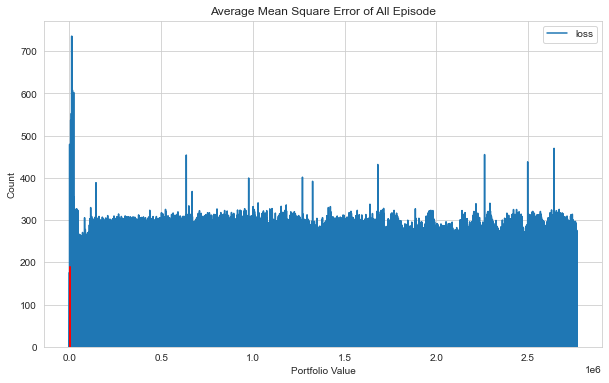

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

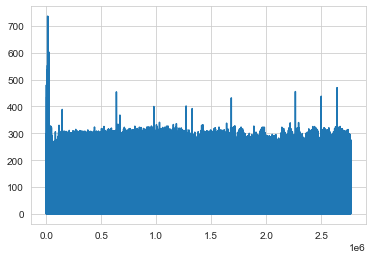

In [5]:
plt.plot(agent.model.losses)

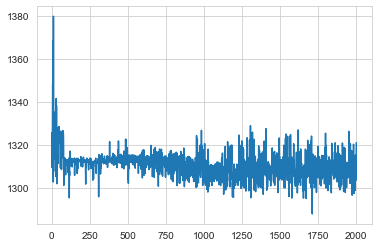

In [6]:
plt.plot(portfolio_value)

episode end value: 1085.05, duration: 0:00:00.181060
Sell: 723 times, Buy: 661 times


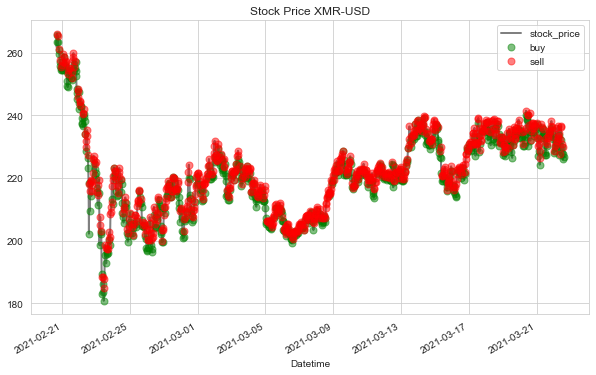

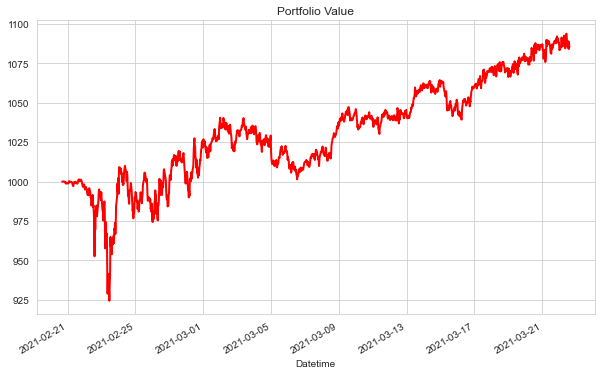

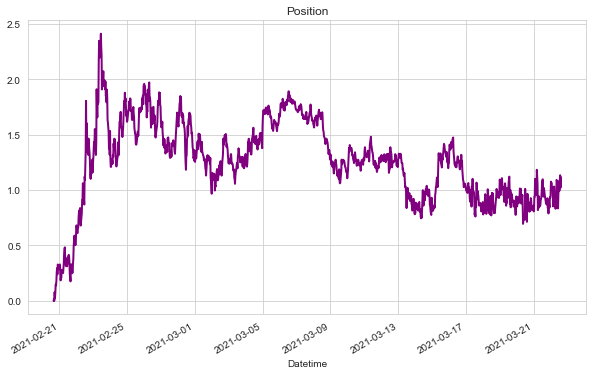

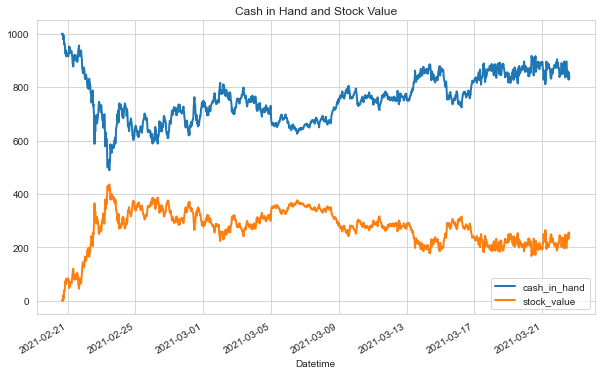

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: XMR-USD
Start: 2021-02-20 16:00:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 1.50 %
Volatility: 0.0507
shape ratio: 0.0782
Maximun drawdown: -7.69 %
Calmar ratio: 0.1946
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.60 %
Volatility (benchmark): 0.1707
shape ratio: -0.2168
Maximun drawdown: -32.08 %
Calmar ratio (benchmark): -0.0811


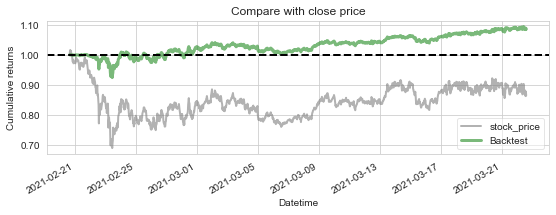

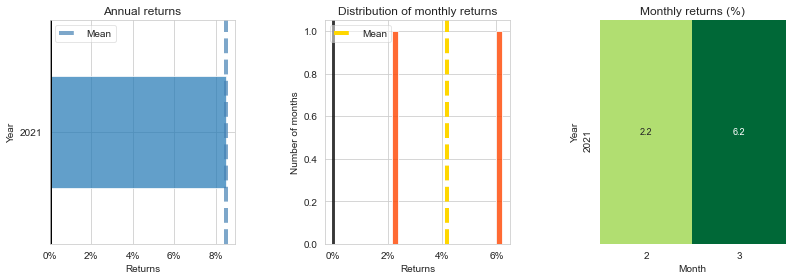

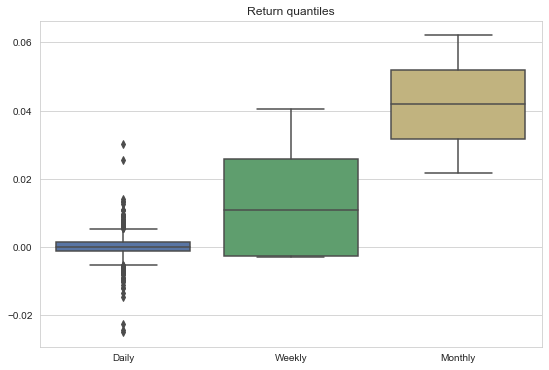

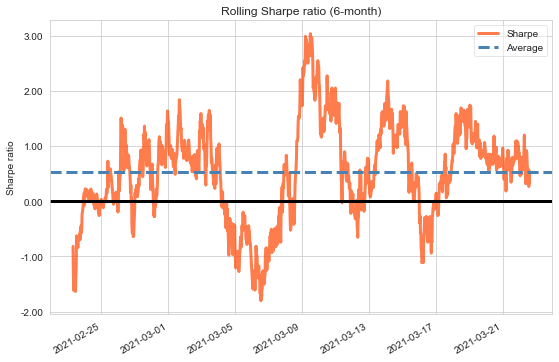

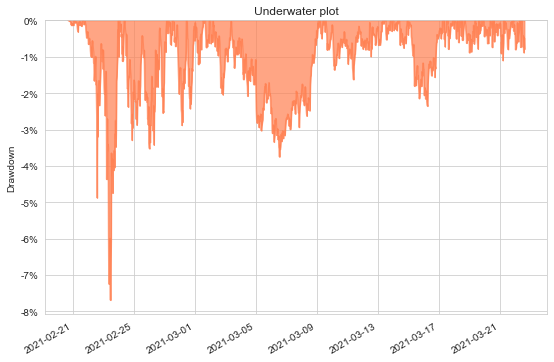

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')